## Default of Credit Card Clients
### DAY-6

### A Decision Tree in Scikit-Learn

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\cleaned_data.csv')

In [3]:
features_response = df.columns.tolist()

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [5]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [6]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [8]:
X_train ,X_test,y_train,y_test = train_test_split(df[features_response[:-1]].values,df['default payment next month'].values,test_size=0.2,random_state=24)

In [9]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [10]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

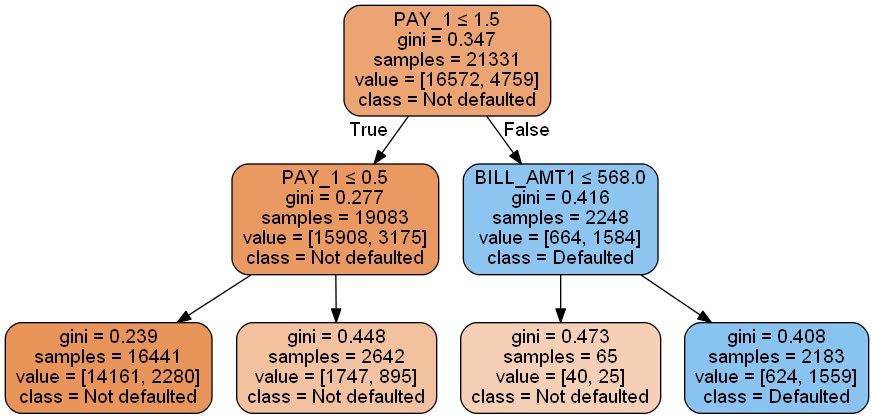

In [20]:
dot_data = tree.export_graphviz(dt,out_file='tree1_.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = features_response[:-1] ,class_names = ['Not defaulted', 'Defaulted'] )
import pydot

(graph,) = pydot.graph_from_dot_file('tree1_.dot')
graph.write_png('tree1_.png')
from IPython.display import Image
Image(filename = 'tree1_.png')

In [21]:
features_response[:-1].index('PAY_1')

4

In [22]:
X_train.shape

(21331, 17)

In [23]:
sum(X_train[:,4] <= 1.5)/X_train.shape[0]

0.8946134733486475

### Finding Optimal Hyperparameters for a Decision Tree

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
X_train.shape

(21331, 17)

In [33]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12],'criterion':['gini','entropy']}

In [34]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [35]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   16.0s finished
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2), iid=False,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [77]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.039910,0.000731,0.005018,0.001547,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,13,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.078382,0.007099,0.005792,0.001797,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,9,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.158390,0.009875,0.004995,0.001730,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,3,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.212342,0.010389,0.005006,0.002741,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.744848,0.745757,0.753148,0.740677,0.746108,0.004493,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.295268,0.025176,0.005322,0.001622,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.728512,0.733448,0.751840,0.730343,0.736036,0.009294,5,0.811958,0.808296,0.803345,0.802003,0.806400,0.003974
5,0.374123,0.035840,0.007329,0.002383,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.708897,0.704627,0.714640,0.710317,0.709620,0.003576,8,0.849310,0.854497,0.841322,0.836847,0.845494,0.006852
6,0.398192,0.059262,0.005983,0.001332,gini,12,"{'criterion': 'gini', 'max_depth': 12}",0.674141,0.656239,0.674337,0.686360,0.672769,0.010751,12,0.888091,0.903628,0.885534,0.875689,0.888235,0.010021
7,0.054642,0.002353,0.004448,0.001349,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,13,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
8,0.100906,0.003472,0.004779,0.000757,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,9,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
9,0.198346,0.003359,0.005220,0.002295,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.728790,0.734996,0.744505,0.737504,0.736449,0.005630,4,0.756304,0.753267,0.749654,0.752308,0.752883,0.002377


Text(0, 0.5, 'ROC AUC')

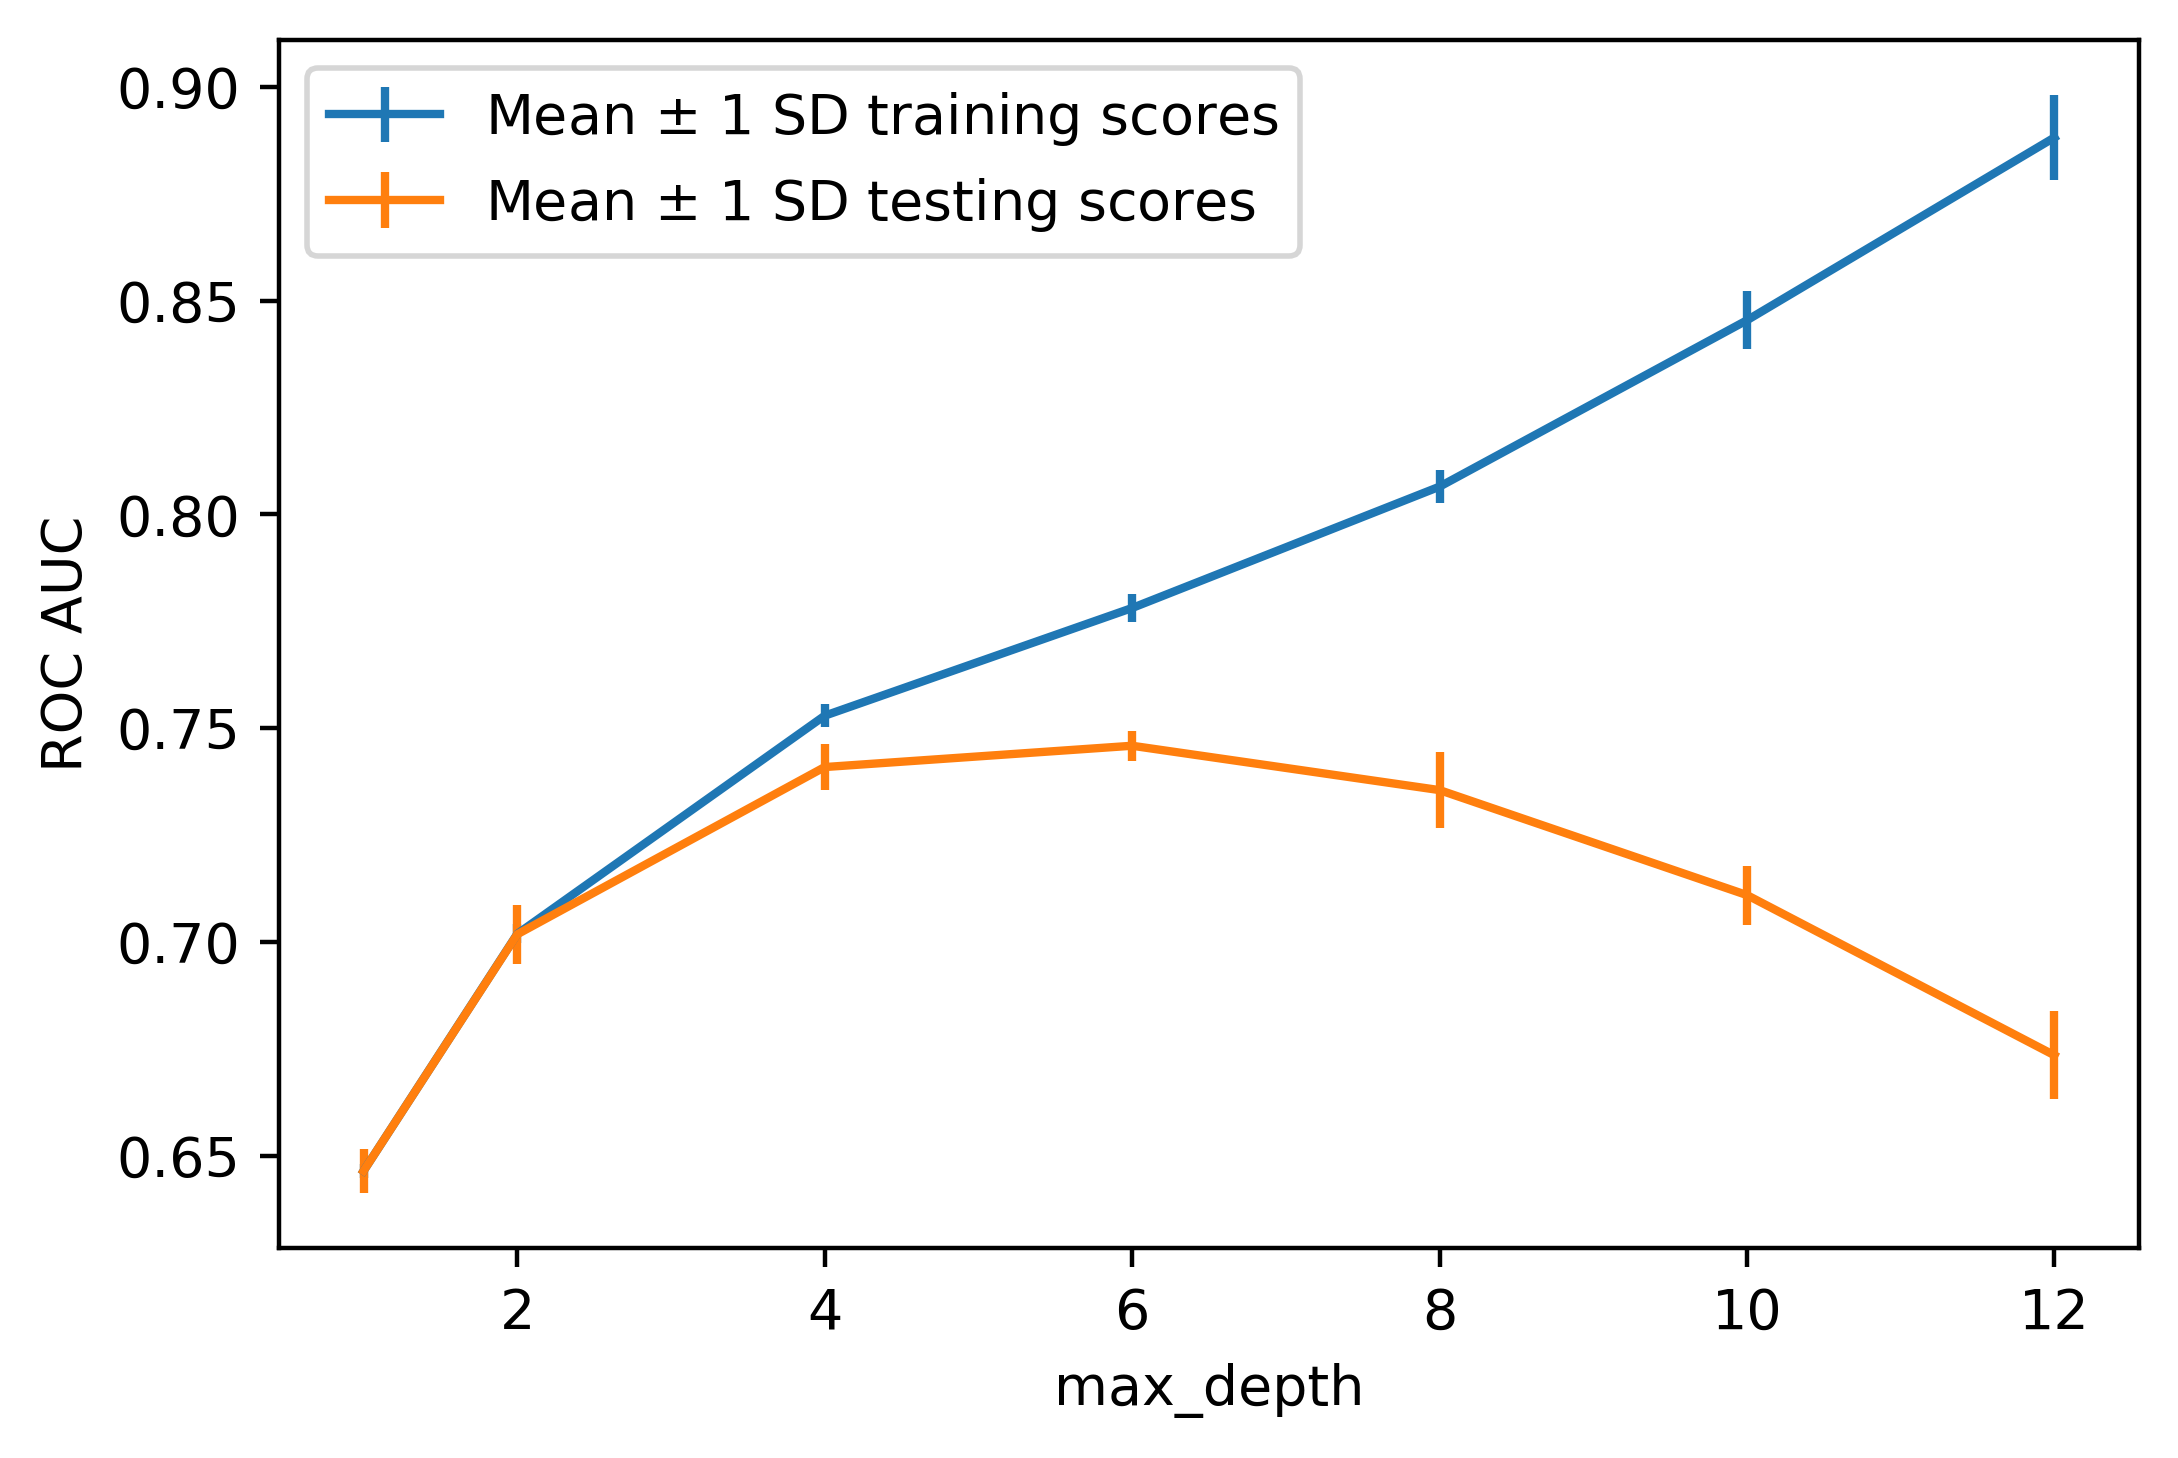

In [32]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

### Fitting a Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None)

In [80]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [81]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [82]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   28.2s finished
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             iid=False,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [84]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
cv_rf_ex_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.127160,0.013427,0.007729,0.000827,10,{'n_estimators': 10},0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,10,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.226403,0.003108,0.009986,0.000686,20,{'n_estimators': 20},0.745612,0.753712,0.777616,0.771737,0.762169,0.012998,9,0.772819,0.771499,0.765944,0.765395,0.768914,0.003284
2,0.393946,0.052268,0.015210,0.002765,30,{'n_estimators': 30},0.747259,0.754154,0.777954,0.771825,0.762798,0.012524,7,0.774655,0.772100,0.765026,0.766697,0.769620,0.003910
3,0.445059,0.004254,0.016966,0.000018,40,{'n_estimators': 40},0.746682,0.754553,0.777709,0.773134,0.763020,0.012813,4,0.774300,0.772642,0.765051,0.765876,0.769467,0.004057
4,0.552791,0.004601,0.021194,0.001635,50,{'n_estimators': 50},0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,1,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
5,0.662236,0.003001,0.024438,0.000864,60,{'n_estimators': 60},0.748437,0.755604,0.779478,0.770978,0.763624,0.012252,2,0.775419,0.773615,0.766133,0.767032,0.770550,0.004031
6,0.772438,0.002953,0.029181,0.001650,70,{'n_estimators': 70},0.747491,0.754465,0.779104,0.771023,0.763021,0.012620,3,0.774420,0.773379,0.765960,0.766174,0.769983,0.003934
7,0.936260,0.034851,0.047888,0.014186,80,{'n_estimators': 80},0.747424,0.754488,0.778753,0.770872,0.762884,0.012502,5,0.774234,0.773257,0.765978,0.766220,0.769922,0.003840
8,1.017783,0.063711,0.034651,0.000826,90,{'n_estimators': 90},0.747097,0.753794,0.778507,0.770426,0.762456,0.012571,8,0.774095,0.772973,0.766022,0.765748,0.769709,0.003846
9,1.121500,0.028262,0.038897,0.000706,100,{'n_estimators': 100},0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,6,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750


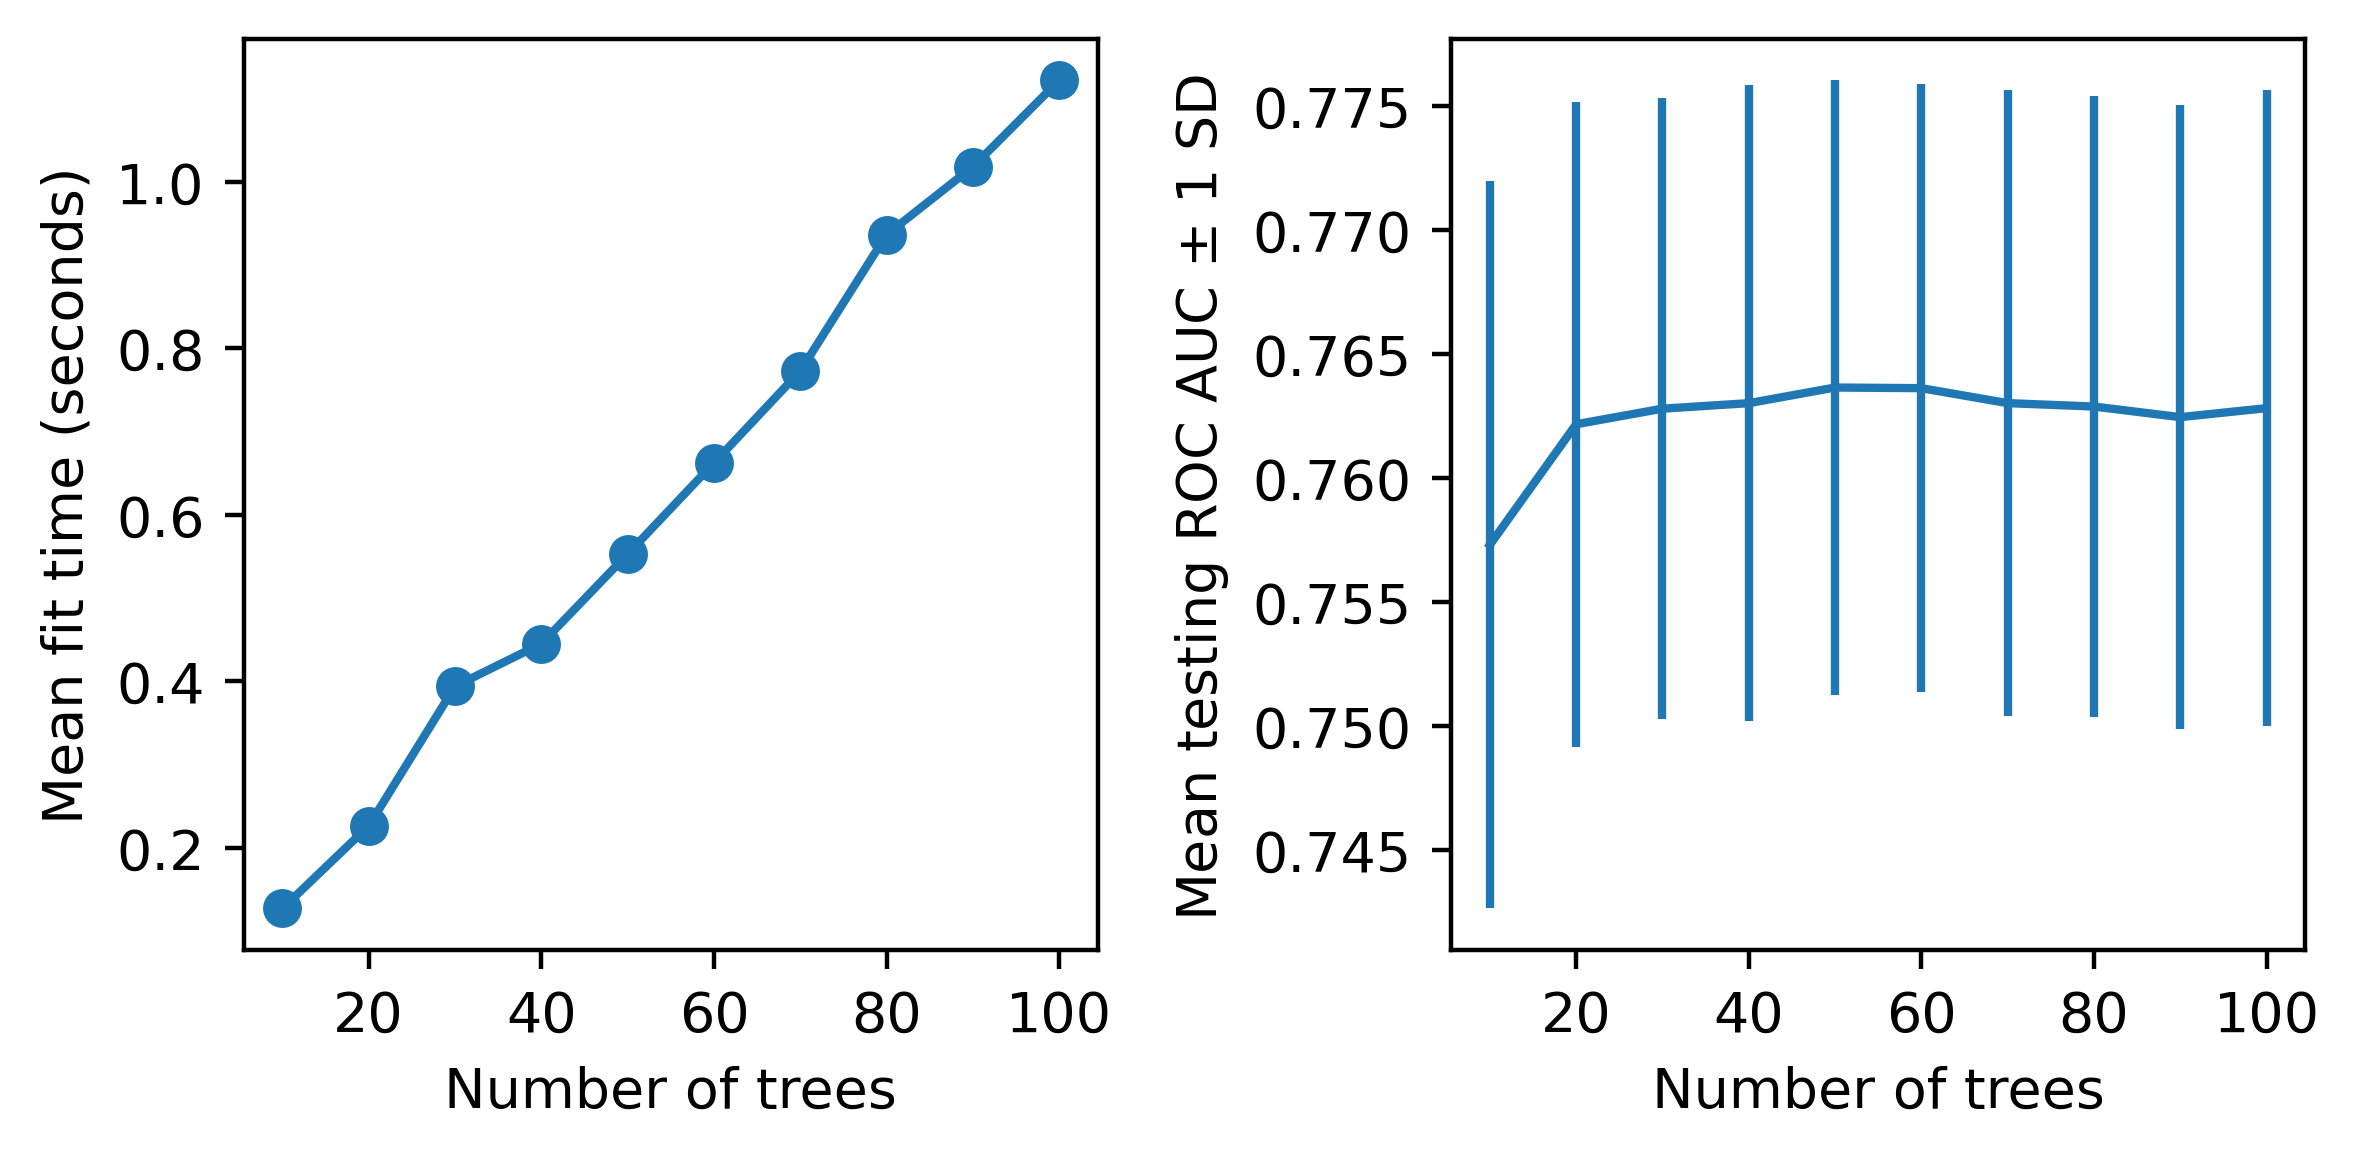

In [85]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [86]:
cv_rf_ex.best_params_

{'n_estimators': 50}

In [89]:
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.609609
11,PAY_AMT1,0.094123
0,LIMIT_BAL,0.079265
13,PAY_AMT3,0.047067
12,PAY_AMT2,0.035393
6,BILL_AMT2,0.022422
14,PAY_AMT4,0.021164
15,PAY_AMT5,0.015962
10,BILL_AMT6,0.014293
8,BILL_AMT4,0.013454
